<a href="https://colab.research.google.com/github/stochasticats/credit-card-fraud-detection/blob/master/creditcardfrauddetection_keras_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import os
import shutil
import matplotlib.pyplot as plt

2.2.0-rc1


In [0]:
!unzip -uq "/content/drive/My Drive/creditcard.csv.zip"

In [0]:
dataset = pd.read_csv("creditcard.csv", header = 0)

In [0]:
model_features = dataset.iloc[:,1:30].columns

In [6]:
print(model_features)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [0]:
dataset["Amount"] = (dataset["Amount"] - dataset["Amount"].min()) / (dataset["Amount"].max() - dataset["Amount"].min())

In [8]:
dataset["Amount"].describe()

count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: Amount, dtype: float64

In [9]:
dataset["Amount"].head()

0    0.005824
1    0.000105
2    0.014739
3    0.004807
4    0.002724
Name: Amount, dtype: float64

In [10]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [12]:
dataset[model_features].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [33]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(dataset[model_features], dataset["Class"].to_numpy())

ERROR! Session/line number was not unique in database. History logging moved to new session 60


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.15)
y_train = np.reshape(y_train, (len(y_train),1))
y_test = np.reshape(y_test, (len(y_test),1))

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483335, 29)
(85295, 29)
(483335, 1)
(85295, 1)


In [37]:
def create_model():
  model = tf.keras.Sequential([
      # This is the first layer
      tf.keras.layers.Dense(14, input_shape=(29,), activation='relu'),
      tf.keras.layers.Dense(7, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])
  
  adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(
        loss = 'binary_crossentropy', 
        optimizer = adam, 
        metrics = ['accuracy'])
  return model

model = create_model()

model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 61
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x = x_train, y = y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.1547 - accuracy: 0.9374 - val_loss: 0.0881 - val_accuracy: 0.9619
Epoch 2/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0694 - accuracy: 0.9731 - val_loss: 0.0563 - val_accuracy: 0.9794
Epoch 3/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0482 - accuracy: 0.9831 - val_loss: 0.0416 - val_accuracy: 0.9855
Epoch 4/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0327 - val_accuracy: 0.9906
Epoch 5/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 0.0275 - val_accuracy: 0.9926
Epoch 6/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.0235 - val_accuracy: 0.9932
Epoch 7/10
15105/15105 [==============================] - 23s 2ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
probabilities = model.predict(x = x_test)
print(probabilities)

[[1.2276332e-18]
 [1.0000000e+00]
 [6.8623829e-10]
 ...
 [9.9953437e-01]
 [1.0000000e+00]
 [3.9570244e-07]]


Confusion matrix, without normalization
[[42275   307]
 [   75 42638]]


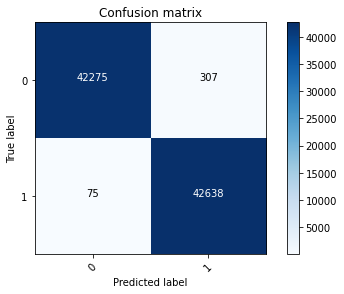

In [47]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, (probabilities>0.5).astype(int))
plot_confusion_matrix(cnf_matrix, classes = range(2))
plt.show()